# view 1t and 5 kt coeff

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
import os, sys
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit

# 1t coeff
#### pe

In [76]:
# fit odd order, even order is 0
def odd_func(x, a, b, c, d, e):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9
# fit even order, even order is 0
def even_func(x, a, b, c, d, e):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8
# load data
def LoadDataPE(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    return data


def LoadFileTime(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)   
    data = eval('np.array(h.root.'+ coeff + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data

In [77]:
# fit odd order, even order is 0
def odd_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**1 + b * x**3 + c * x**5 + d * x**7 + e * x**9 + f * x**11 + g * x**13 + h * x**15 + i*x**17 + j*x**19
# fit even order, even order is 0
def even_func(x, a, b, c, d, e, f, g, h, i, j):
    return a * x**0 + b * x**2 + c * x**4 + d * x**6 + e * x**8 + f * x**10 + g * x**12 + h * x**14 + i*x**16 + j*x**18
# load data
def LoadDataPE(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data


def LoadFileTime(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')

    coeff = 'coeff' + str(order)
    
    data = eval('np.array(h.root.'+ coeff + '[:])')

    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    return data

(15,)


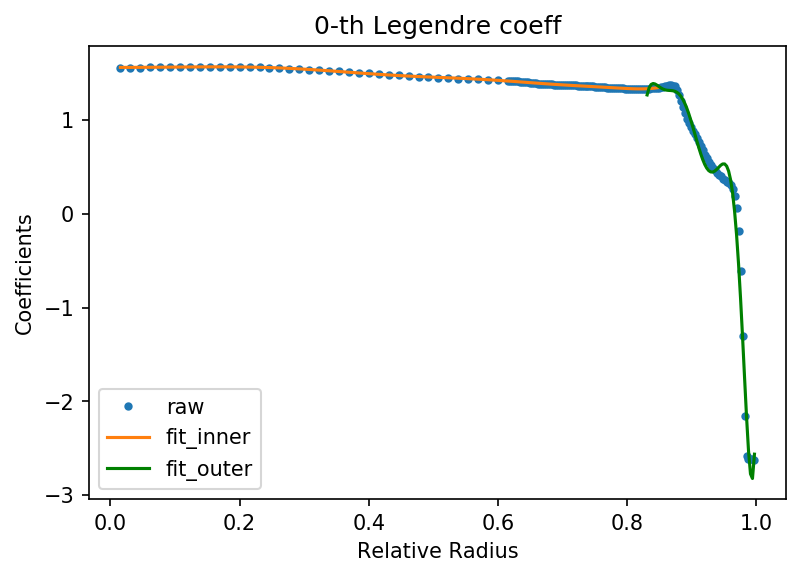

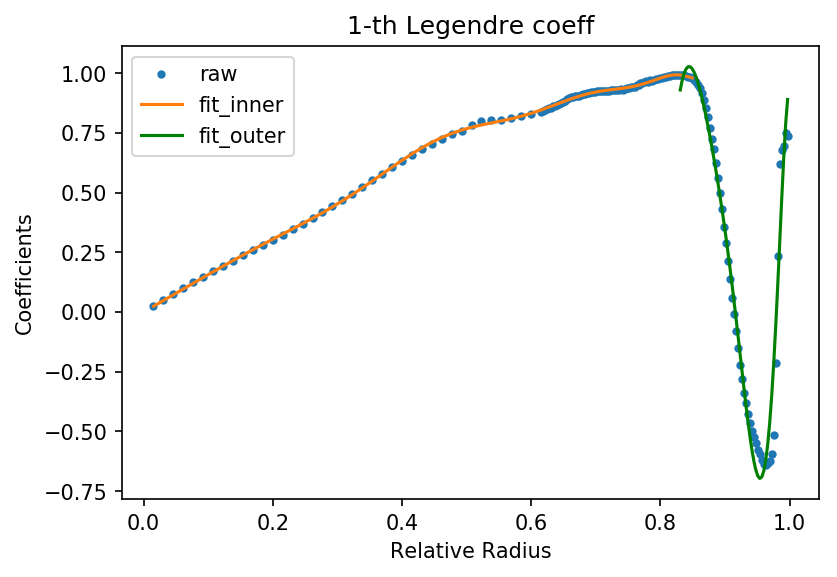

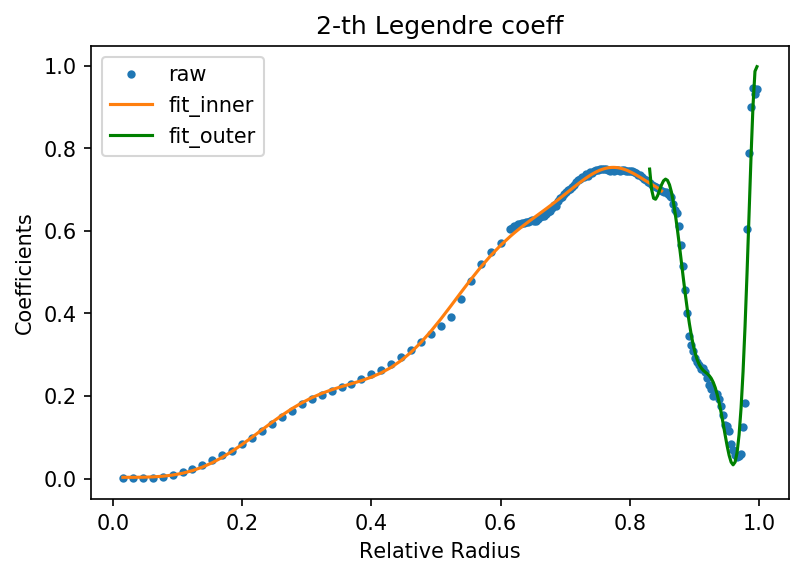

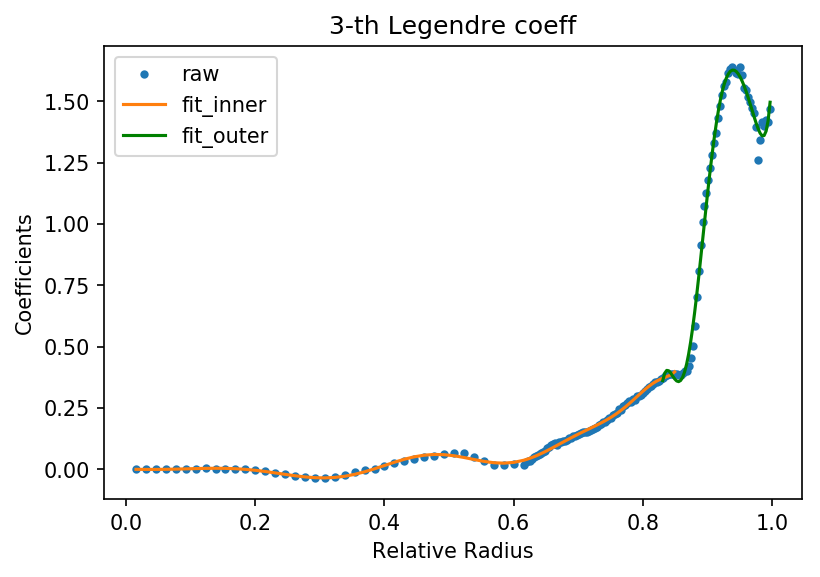

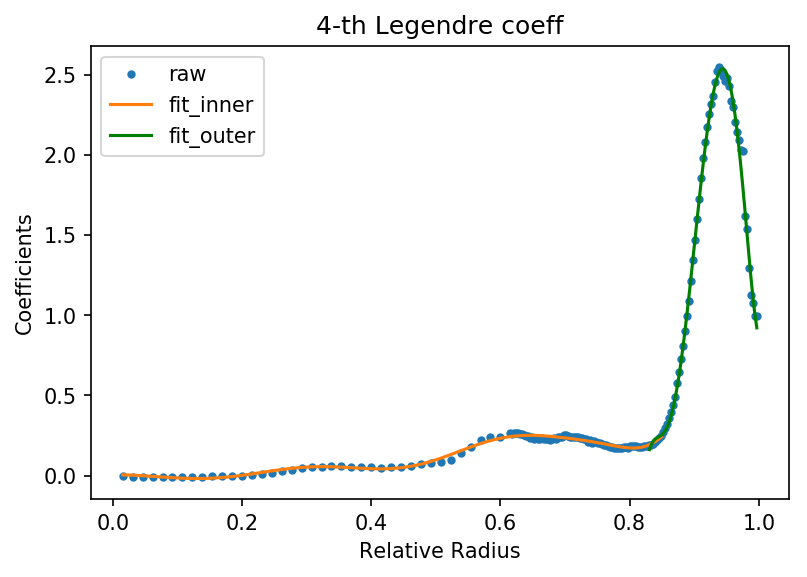

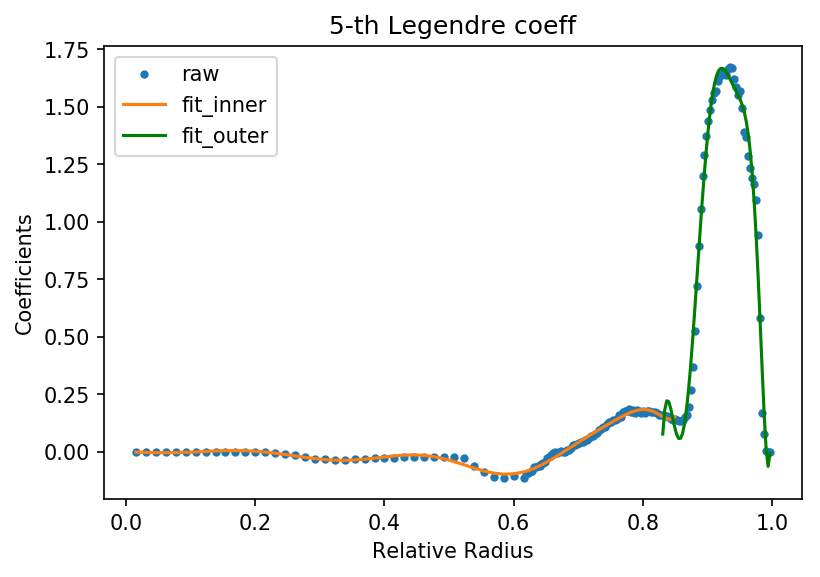

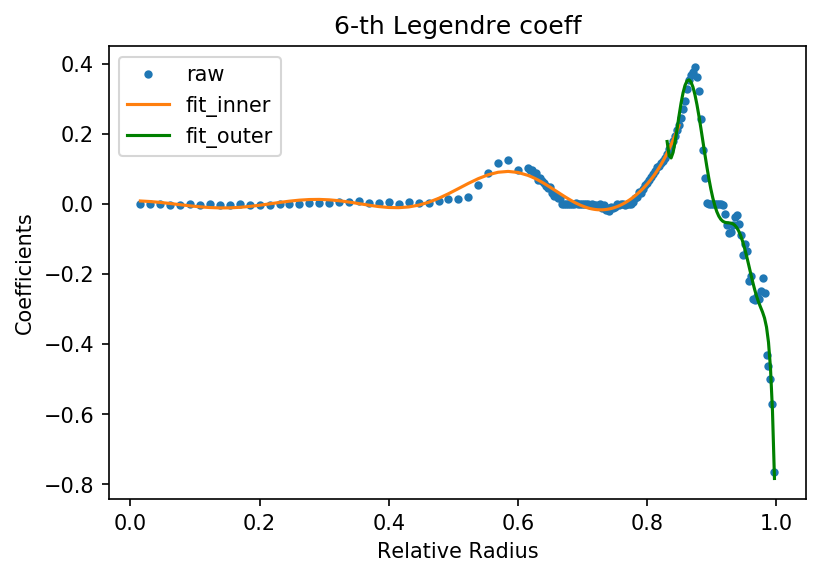

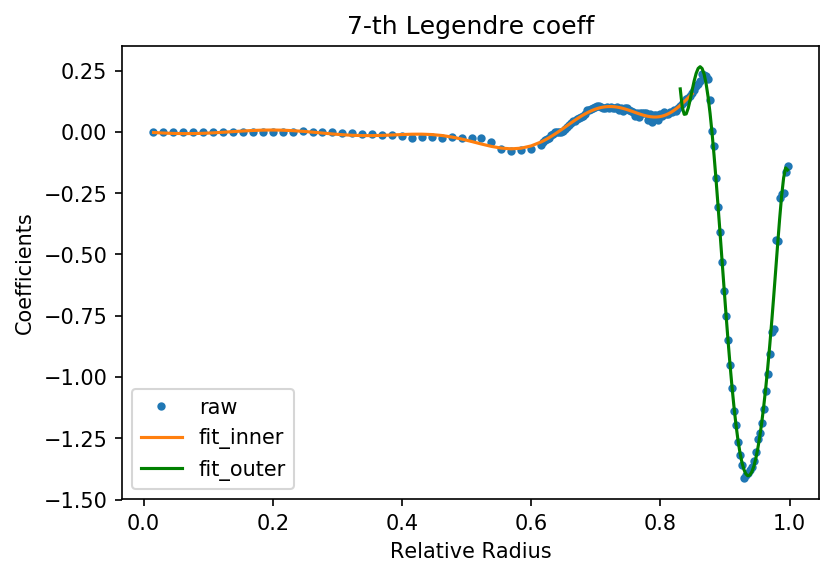

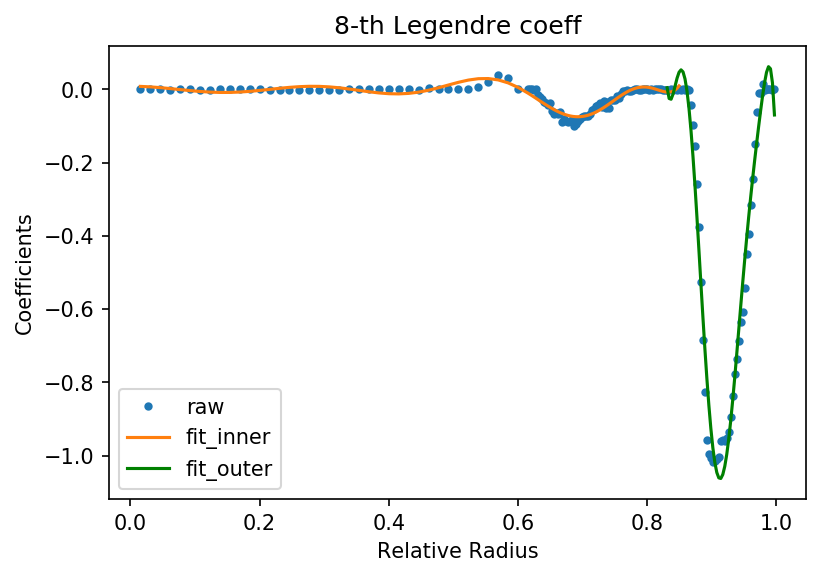

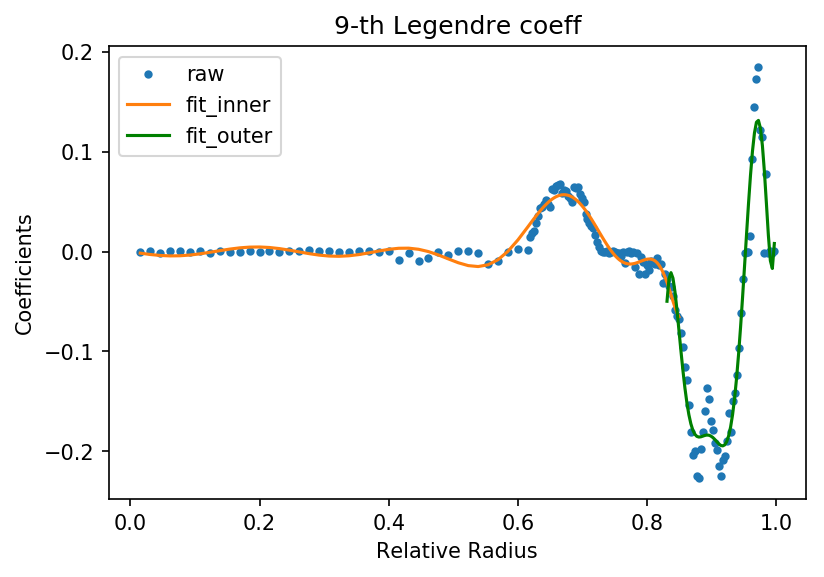

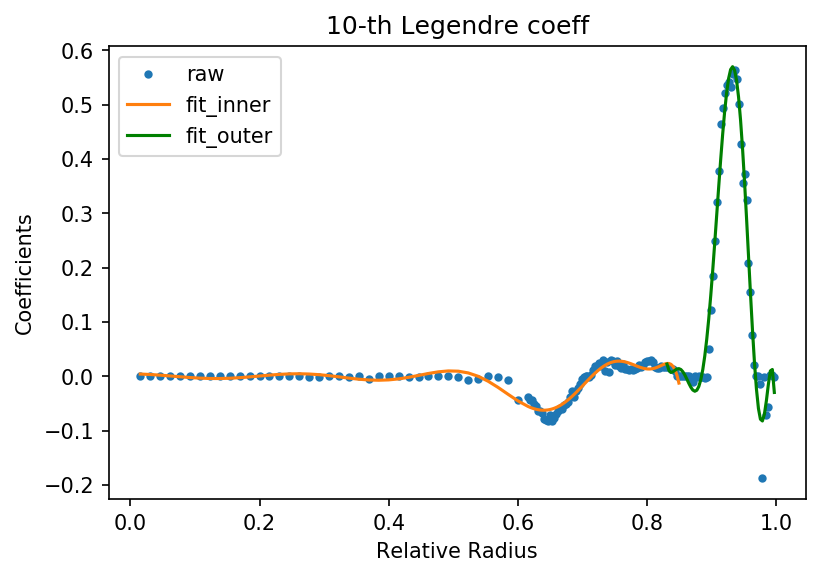

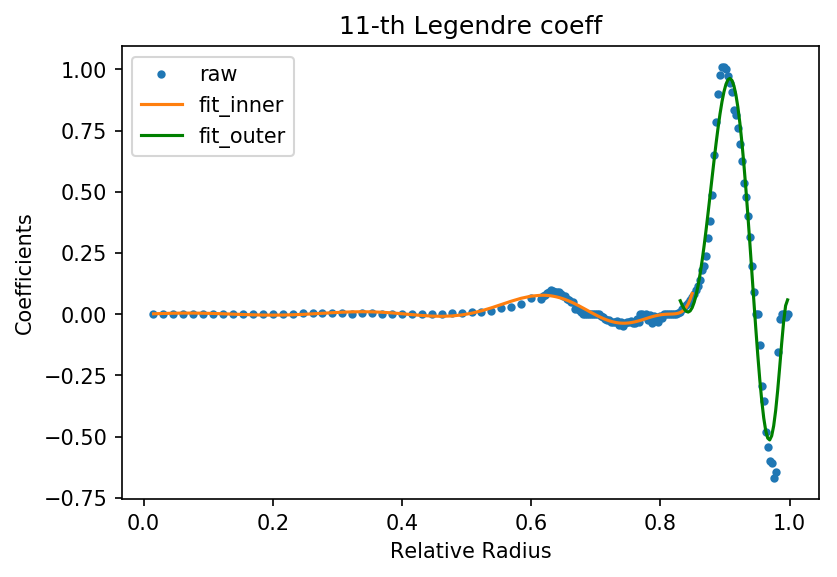

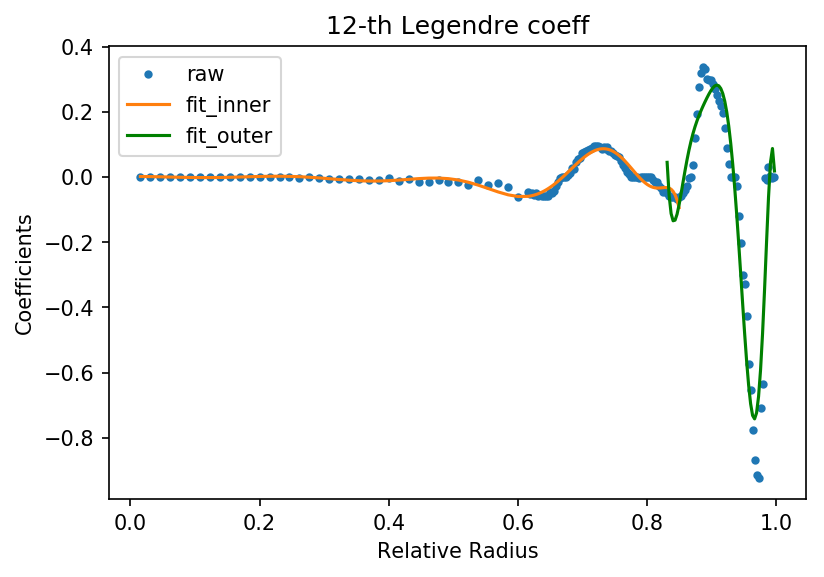

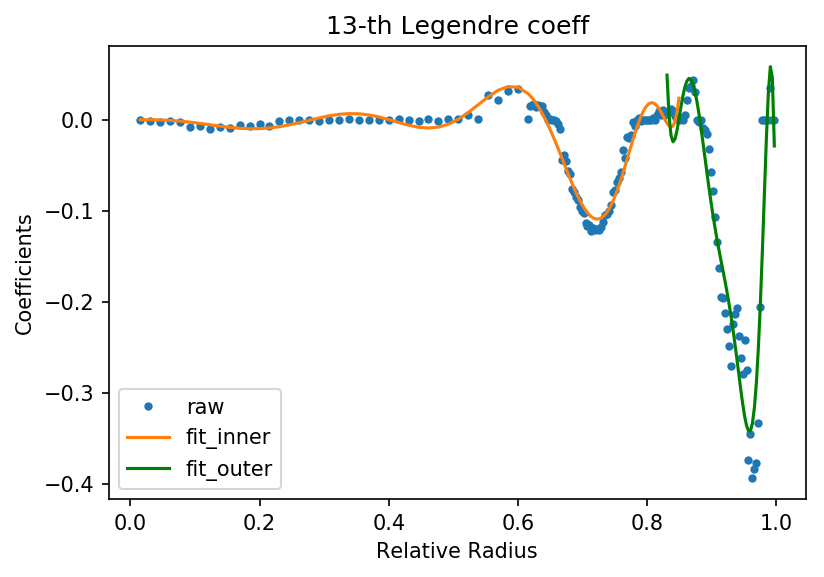

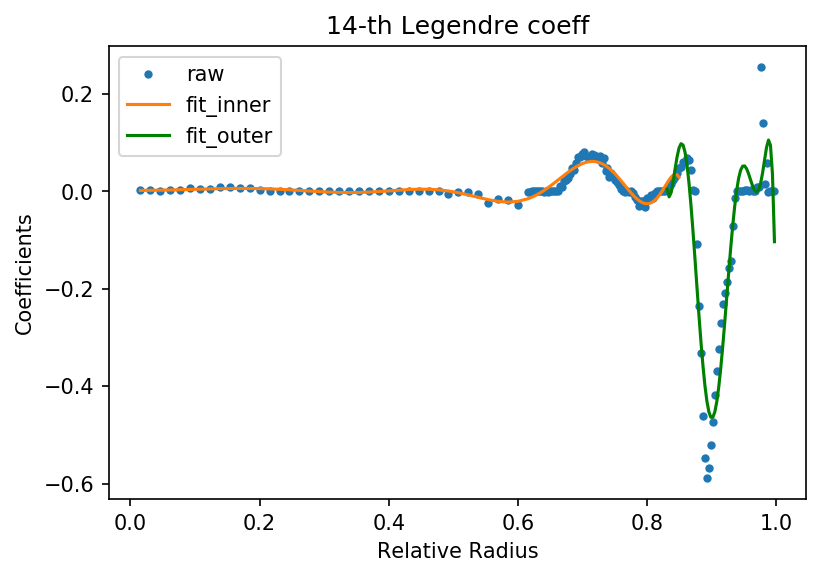

In [118]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els5/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    try:
        k = LoadDataPE(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, k))
    except:
        print('error: %.3f' % radius)


coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')

print(coeff_pe[:,0].shape)

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    
    # segmented
    bd_1 = 0.85
    bd_2l = 0.50 
    bd_2r = 0.80
    bd_3 = 0.83
    
    fit_max = 5
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    plt.plot(x, data,'.')

    index1 = (x<=bd_1) & (x>=-bd_1) & (x!=0)

    if(i%2==1):
        popt1, pcov = curve_fit(odd_func, x[index1], data[index1])
        output1 = odd_func(x[index1], *popt1)
    else:
        popt1, pcov = curve_fit(even_func, x[index1], data[index1])
        output1 = even_func(x[index1], *popt1)

    index2 = (np.abs(x)<=bd_2r) & (np.abs(x)>=bd_2l)
    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, x[index2], data[index2])
        output2 = odd_func(x[index2], *popt2)
        #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
    else:
        popt2, pcov = curve_fit(even_func, x[index2], data[index2])
        #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
        output2 = even_func(x[index2], *popt2)
    
    index3 = (x >= bd_3) | (x <= - bd_3)
    if(i%2==1):
        popt3, pcov = curve_fit(odd_func, x[index3], data[index3])
        output3 = odd_func(x[index3], *popt3)
    else:
        popt3, pcov = curve_fit(even_func, x[index3], data[index3])
        output3 = even_func(x[index3], *popt3)

    #x_total = np.hstack((x[index1],x[index2],x[index3]))
    #y_total = np.hstack((output1,output2,output3))
    #x_total = np.hstack((x[index1],x[index3]))
    #y_total = np.hstack((output1,output3))
    #index = np.argsort(x_total)

    plt.plot(x[index1],output1)
    plt.plot(x[index3][x[index3]>0],output3[x[index3]>0], color='g')
    plt.plot(x[index3][x[index3]<0],output3[x[index3]<0], color='g')  
    #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit_inner','fit_outer'])
    plt.savefig('./fig_view/PE_%d-th Legendre coeff.pdf' % i)
    plt.show()

(15,)
120


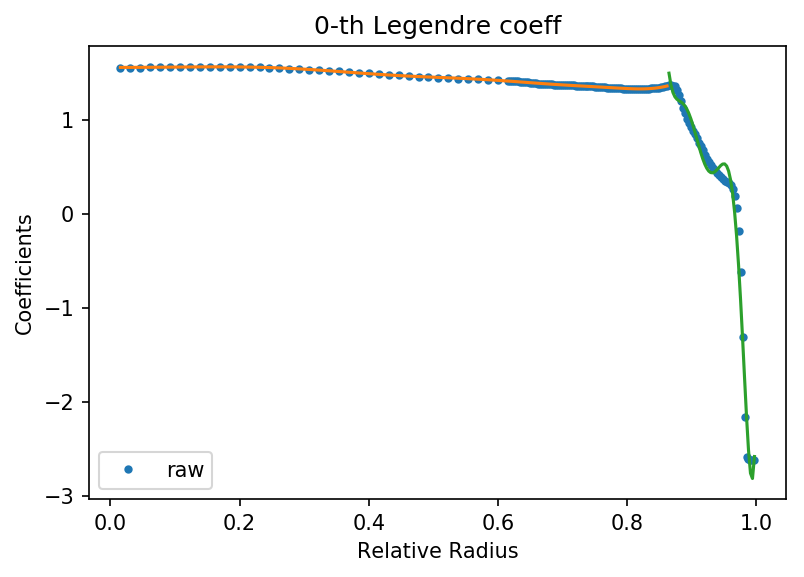

133


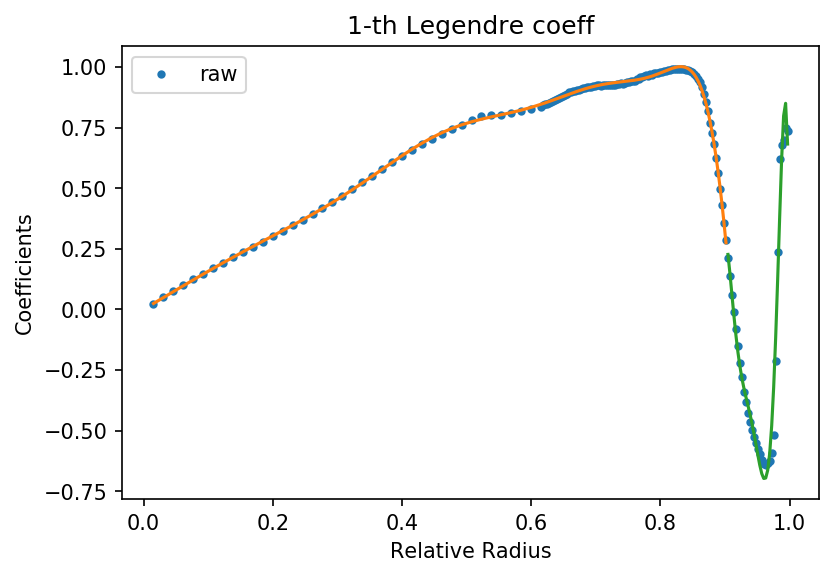

114


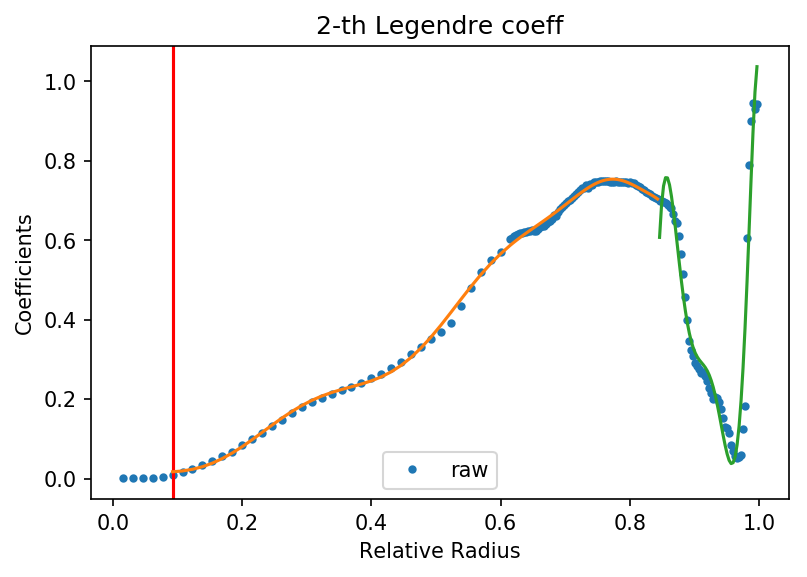

100


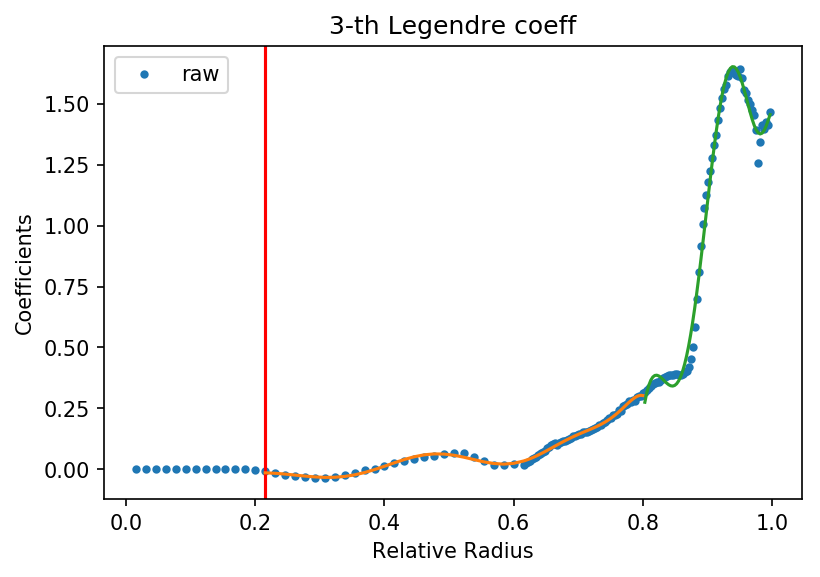

86


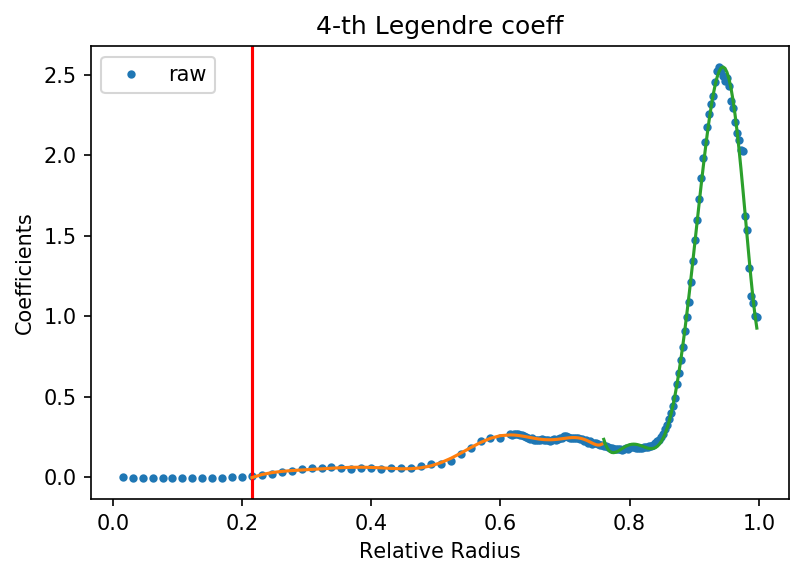

97


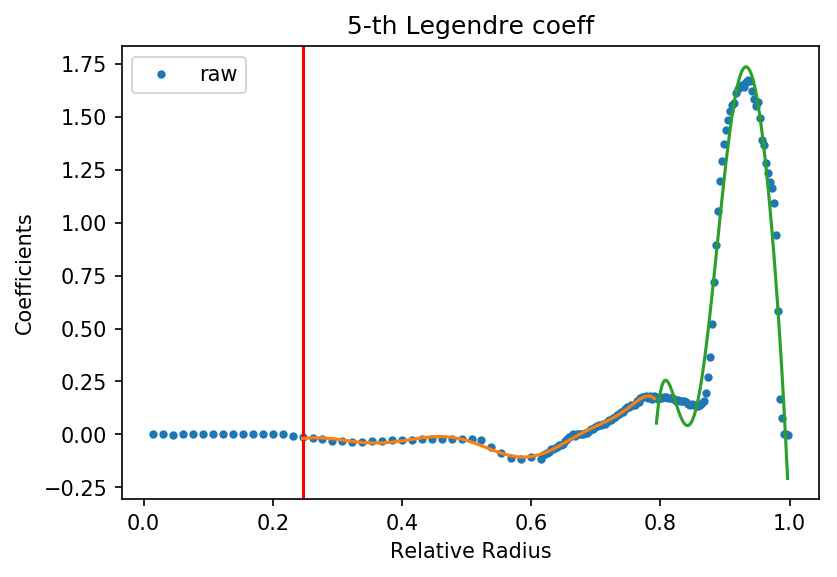

77


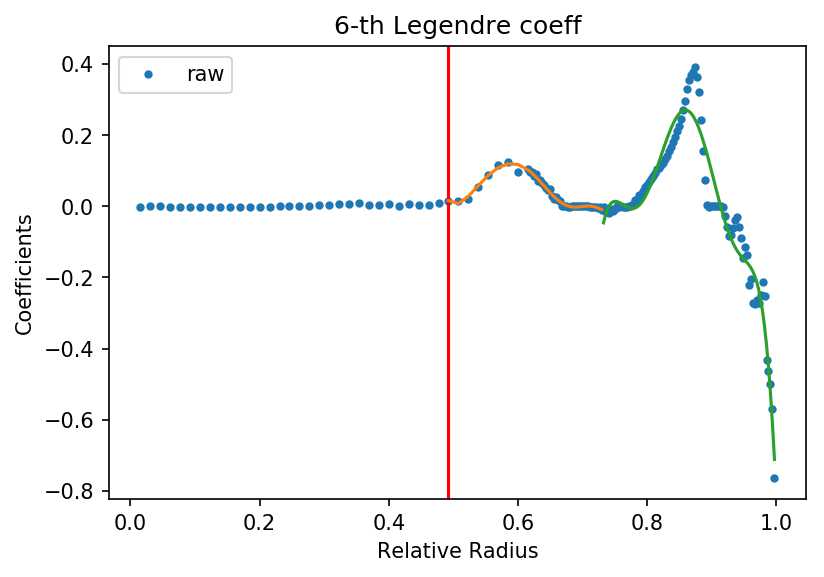

81


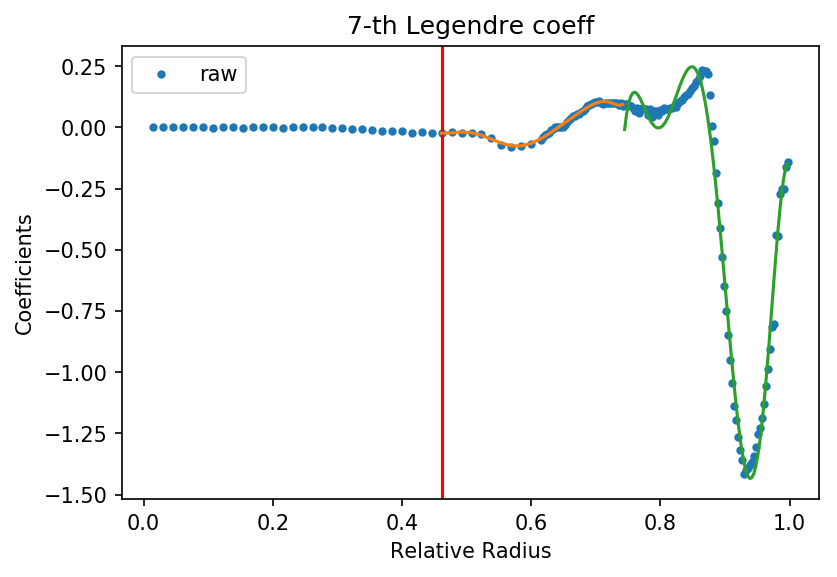

81


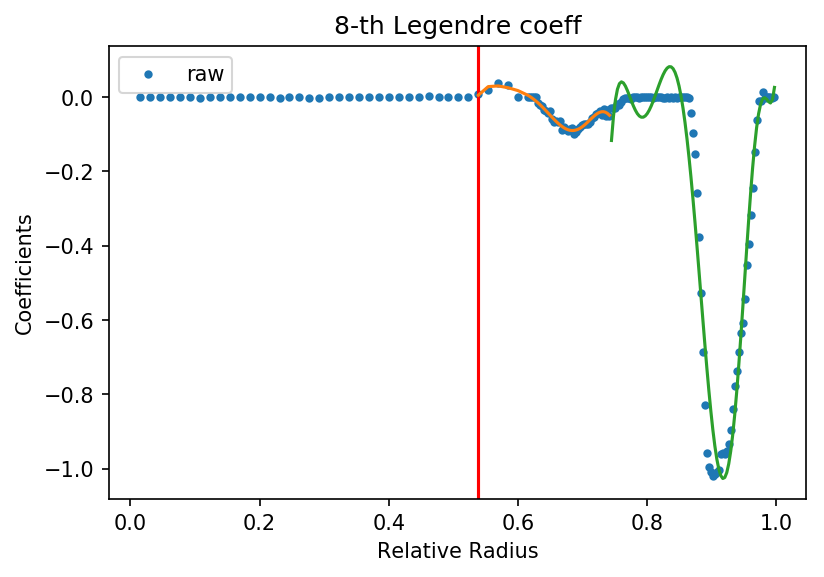

78


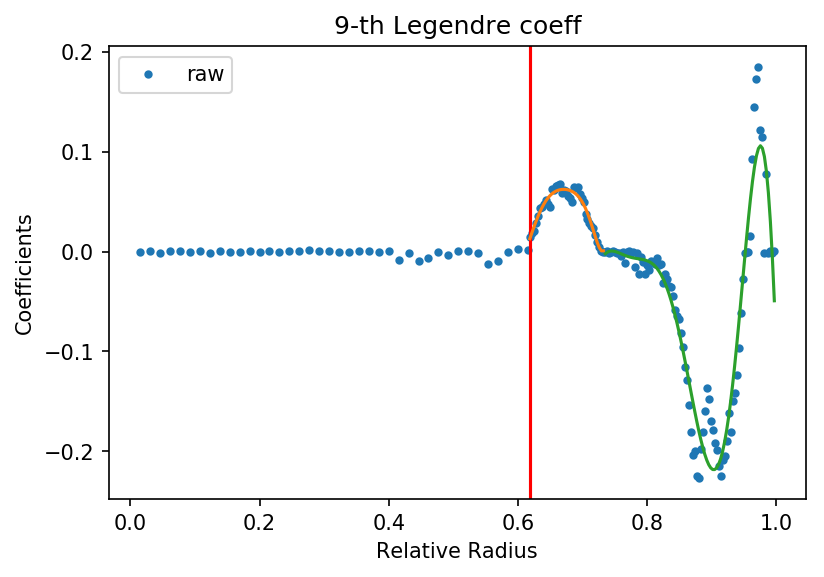

82


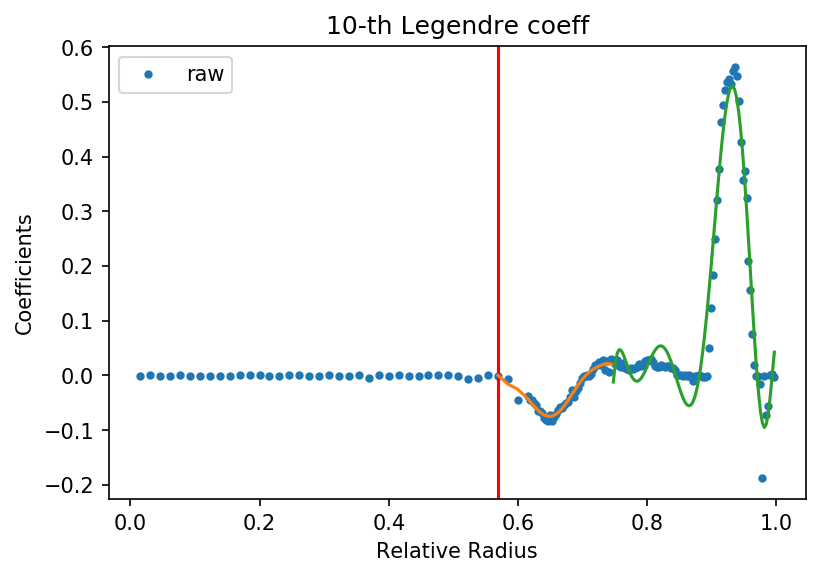

84


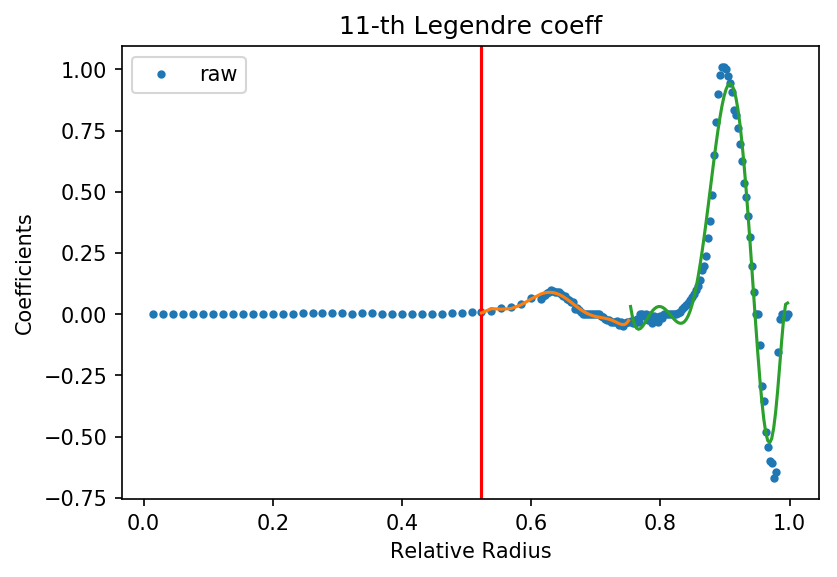

84


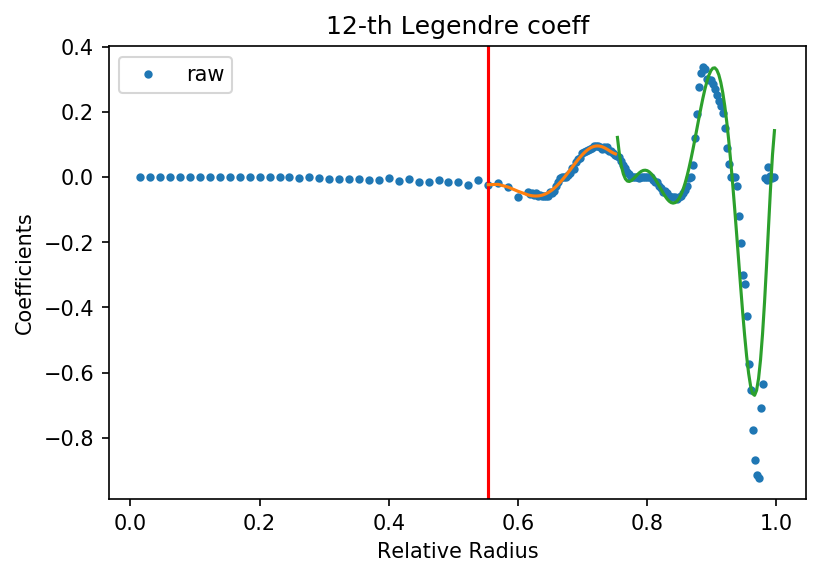

70


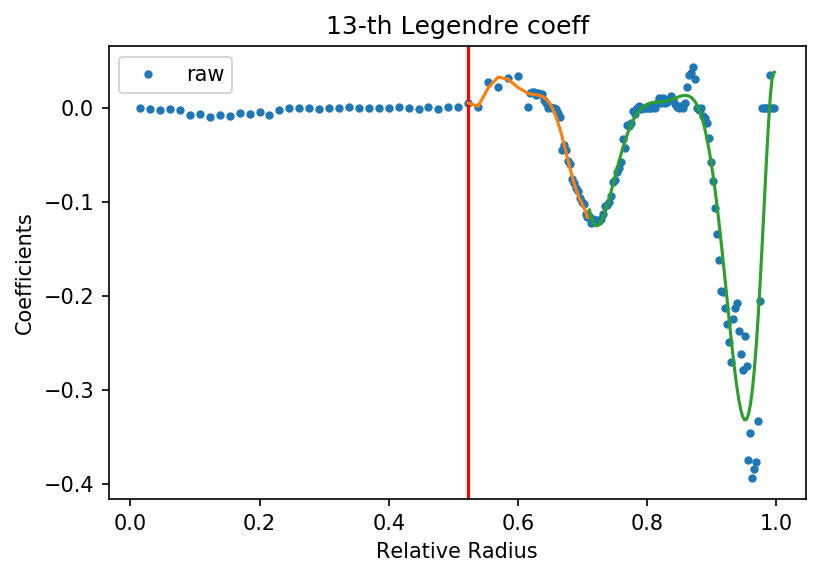

61


TypeError: Improper input: N=10 must not exceed M=5

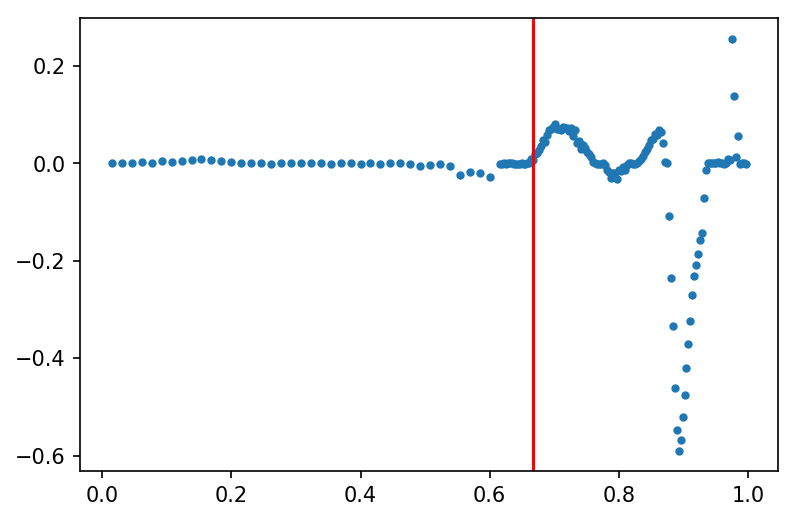

In [95]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els5/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    k = LoadDataPE(path, str_radius, order)
    rd.append(np.array(radius))
    coeff_pe = np.hstack((coeff_pe, k))

coeff_pe = np.reshape(coeff_pe,(-1,np.size(ra)),order='F')

print(coeff_pe[:,0].shape)

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    plt.plot(x, data,'.')
    for j_index, j in enumerate(data):
        if((np.abs(data[j_index])>0.03) & (np.sum(np.abs(data[0:j_index])>0.03)==0)):
            if(j_index>0):
                break
    if (j_index != np.size(data)-1):
        for k in np.arange(j_index, 0, -1):
            if((np.abs(data[k])<0.02)):
            #if((np.abs(data[k])<0.015) & (np.sum(np.abs(data[0:k])>0.02)==0)):
                plt.axvline(x[k-1],color='red')
                break
    # 1-st diff 
    # plt.plot(x[0:-1],np.diff(data)/np.diff(x)/1e2)
    coeff = np.zeros_like(x)
    if (j_index == np.size(data)-1):
        k=1
    x1 = x[0:k-1]
    
    error = np.zeros(np.size(np.arange(k+10 ,np.size(data)-10,1)))
    for k2_index, k2 in enumerate(np.arange(k+10,np.size(data)-10,1)):
        x2 = x[k-1:k2]
        a2 = data[k-1:k2]
        
        x3 = x[k2::]
        a3 = data[k2::]
    
        if(i%2==1):
            popt2, pcov = curve_fit(odd_func, x2, a2)
            output2 = odd_func(x2, *popt2)
        else:
            popt2, pcov = curve_fit(even_func, x2, a2)
            output2 = even_func(x2, *popt2)
            
        if(i%2==1):
            popt3, pcov = curve_fit(odd_func, x3, a3)
            output3 = odd_func(x3, *popt3)
        else:
            popt3, pcov = curve_fit(even_func, x3, a3)
            output3 = even_func(x3, *popt3)
            
        #print(output2, output3)
        #error[k2_index] = np.sum((np.exp(output2) - np.exp(a2))**2) +  np.sum((np.exp(output3) - np.exp(a3))**2)
        #error[k2_index] = np.sum((output2 - a2)**2) +  np.sum((output3 - a3)**2)
        error[k2_index] = np.sum((output2 - a2)**2/((x2-0.8)**2+0.0001)) +  np.sum((output3 - a3)**2/((x3-0.8)**2+0.0001))
    
    min_index = np.where(error == np.min(error))
    k2 = min_index[0][0]
    print(k2)
    x2 = x[k-1:k2]
    a2 = data[k-1:k2]

    x3 = x[k2::]
    a3 = data[k2::]

    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, x2, a2)
        output2 = odd_func(x2, *popt2)
    else:
        popt2, pcov = curve_fit(even_func, x2, a2)
        output2 = even_func(x2, *popt2)

    if(i%2==1):
        popt3, pcov = curve_fit(odd_func, x3, a3)
        output3 = odd_func(x3, *popt3)
    else:
        popt3, pcov = curve_fit(even_func, x3, a3)
        output3 = even_func(x3, *popt3)
        
    plt.plot(x2, output2)
    plt.plot(x3, output3)
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw'])
    plt.show()

In [79]:
ra = np.arange(+0.651, 0.01, -0.01)
for i in np.arange(np.size(coeff_time[:,0])):
    
    # segmented
    bd_1 = 0.80
    bd_2l = 0.50 
    bd_2r = 0.80
    bd_3 = 0.7
    
    fit_max = 5
    data = np.nan_to_num(coeff_time[i,:])
    x = ra/0.65


    index1 = (x<=bd_1) & (x>=-bd_1) & (x!=0)

    if(i%2==1):
        popt1, pcov = curve_fit(odd_func, x[index1], data[index1])
        output1 = odd_func(x[index1], *popt1)
    else:
        popt1, pcov = curve_fit(even_func, x[index1], data[index1])
        output1 = even_func(x[index1], *popt1)

    index2 = (np.abs(x)<=bd_2r) & (np.abs(x)>=bd_2l)
    if(i%2==1):
        popt2, pcov = curve_fit(odd_func, x[index2], data[index2])
        output2 = odd_func(x[index2], *popt2)
        #plt.plot(x[index1], odd_func(x[index1], *popt), 'r-')
    else:
        popt2, pcov = curve_fit(even_func, x[index2], data[index2])
        #plt.plot(x[index1], even_func(x[index1], *popt), 'r-')
        output2 = even_func(x[index2], *popt2)

    index3 = (x >= bd_3) | (x <= - bd_3)
    if(i%2==1):
        popt3, pcov = curve_fit(odd_func, x[index3], data[index3])
        output3 = odd_func(x[index3], *popt3)
    else:
        popt3, pcov = curve_fit(even_func, x[index3], data[index3])
        output3 = even_func(x[index3], *popt3)

    #x_total = np.hstack((x[index1],x[index2],x[index3]))
    #y_total = np.hstack((output1,output2,output3))
    #x_total = np.hstack((x[index1],x[index3]))
    #y_total = np.hstack((output1,output3))
    plt.figure(dpi=150)
    plt.plot(x, data,'.')
    #index = np.argsort(x_total)
    plt.plot(x[index1],output1)
    plt.plot(x[index3][x[index3]>0],output3[x[index3]>0], color='g')
    plt.plot(x[index3][x[index3]<0],output3[x[index3]<0], color='g') 
    #plt.plot(x_total[index],y_total[index])
    #plt.text(0,0.5,r'fit: z^1=%2.3f, z^3=%2.3f, z^5=%2.3f, z^7=%2.3f, z^9=%2.3f' % tuple(popt))
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit_inner', 'fit_outer'])
    plt.show()

NameError: name 'coeff_time' is not defined

In [ ]:
## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els5/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    k = LoadDataPE(path, str_radius, order)
    rd.append(np.array(radius))
    coeff_pe = np.hstack((coeff_pe, k))

coeff_pe = np.reshape(coeff_pe,(-1,np.size(ra)),order='F')

print(coeff_pe[:,0].shape)
from scipy.signal import savgol_filter

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    yhat = savgol_filter(data, 9, 7)
    plt.plot(x, yhat,'.')
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw'])
    plt.show()

In [51]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
print(z)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


(15,)


NameError: name 'x0' is not defined

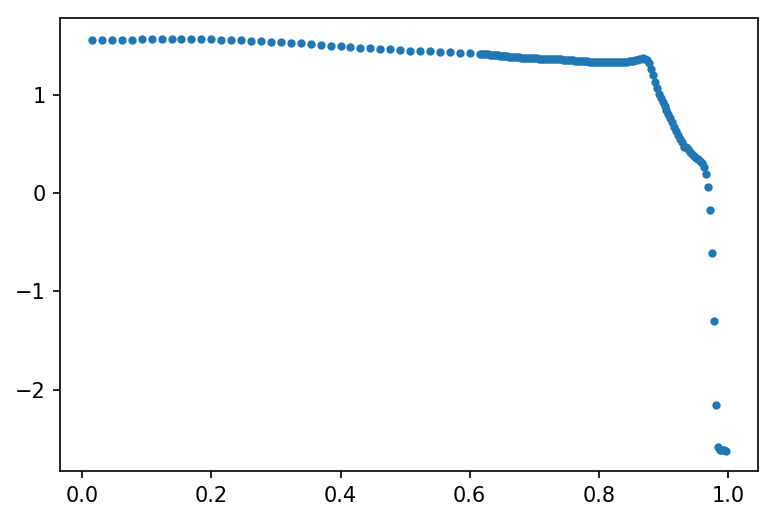

In [80]:
from scipy.optimize import minimize
def odd_func_poly(theta, x):
    size = np.size(theta)
    pw = np.arange(1,2*size-1,2)
    return np.sum(theta*(x**pw))

# fit even order, even order is 0
def even_func_poly(theta, x):
    size = np.size(theta)
    pw = np.arange(0,2*(size-1),2)
    return np.sum(theta*(x**pw))

def odd_func_Legendre(theta, x):
    size = np.size(theta)
    s = 0
    for i in np.arange(1,2*size-1,2):
        k = np.zeros(2*size)
        k[i] = 1
        X = np.polynomial.legendre.legval(x, k)
        s = s + np.sum(X*theta)
    return s

# fit even order, even order is 0
def even_func_Legendre(theta, x):
    size = np.size(theta)
    s = 0
    for i in np.arange(0,2*(size-1),2):
        k = np.zeros(2*size)
        k[i] = 1
        X = np.polynomial.legendre.legval(x, k)
        s = s + np.sum(X*theta)
    return s

## gather the data
path = '../coeff_pe_1t_2.0MeV_dns_Lasso_els4/'
ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.65, 0.002)))

order = 15
coeff_pe = []
rd = []
for radius in ra:
    str_radius = '%.3f' % radius
    k = LoadDataPE(path, str_radius, order)
    rd.append(np.array(radius))
    coeff_pe = np.hstack((coeff_pe, k))

coeff_pe = np.reshape(coeff_pe,(-1,np.size(ra)),order='F')

print(coeff_pe[:,0].shape)

for i in np.arange(np.size(coeff_pe[:,0])):
    plt.figure(dpi=150)
    data = np.nan_to_num(coeff_pe[i,:])
    x = ra/0.65
    plt.plot(x, data,'.')
    for j_index, j in enumerate(data):
        if((np.abs(data[j_index])>0.03) & (np.sum(np.abs(data[0:j_index])>0.03)==0)):
            if(j_index>0):
                break
    if (j_index != np.size(data)-1):
        for k in np.arange(j_index, 0, -1):
            if((np.abs(data[k])<0.02)):
            #if((np.abs(data[k])<0.015) & (np.sum(np.abs(data[0:k])>0.02)==0)):
                plt.axvline(x[k-1],color='red')
                break
    # 1-st diff 
    # plt.plot(x[0:-1],np.diff(data)/np.diff(x)/1e2)
    coeff = np.zeros_like(x)
    if (j_index == np.size(data)-1):
        k=1
    x1 = x[0:k-1]
    
    error = np.zeros(np.size(np.arange(k+10 ,np.size(data)-10,1)))
    for k2_index, k2 in enumerate(np.arange(k+10,np.size(data)-10,1)):
        x2 = x[k-1:k2]
        a2 = data[k-1:k2]
        
        x3 = x[k2::]
        a3 = data[k2::]
        
        theta0 = np.zeros(10)
        result = minimize(odd_func_poly, x0, bounds = ((None, None), (10,100)),method='SLSQP', args = (time))
        z2 = np.polynomial.legendre.legfit(x2, a2, 10)
        z3 = np.polynomial.legendre.legfit(x3, a3, 10)
        print(z2)
        if(i%2==1):
            z2[1::2] = 0
            z3[1::2] = 0
        else:
            z2[0::2] = 0
            z3[0::2] = 0

        '''
        if(i%2==1):
            z[0::2] = 0
        else:
            z[1::2] = 0
        #'''

        #output2 = np.polyval(z2, x2)
        #output3 = np.polyval(z3, x3)
        
        output2 = np.polynomial.legendre.legval(x2, z2)
        output3 = np.polynomial.legendre.legval(x3, z3)
        #print(output2.shape, output3.shape)
        #error[k2_index] = np.sum((output2 - a2)**2) +  np.sum((output3 - a3)**2)
        error[k2_index] = np.sum((output2 - a2)**2/((x2-0.8)**2+0.0001)) +  np.sum((output3 - a3)**2/((x3-0.8)**2+0.0001))

    print(error)
    min_index = np.where(error == np.min(error))
    k2 = min_index[0][0]
    print(k2)
    x2 = x[k-1:k2]
    a2 = data[k-1:k2]
    
    x3 = x[k2::]
    a3 = data[k2::]
        
    z2 = np.polynomial.legendre.legfit(x2, a2, 10)
    z3 = np.polynomial.legendre.legfit(x3, a3, 10)

    if(i%2==1):
        z2[1::2] = 0
        z3[1::2] = 0
    else:
        z2[0::2] = 0
        z3[0::2] = 0

    '''
    if(i%2==1):
        z[0::2] = 0
    else:
        z[1::2] = 0
    #'''

    #output2 = np.polyval(z2, x2)
    #output3 = np.polyval(z3, x3)

    output2 = np.polynomial.legendre.legval(x2, z2)
    output3 = np.polynomial.legendre.legval(x3, z3)
        
    plt.plot(x2, output2)
    plt.plot(x3, output3)
    plt.xlabel('Relative Radius')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw'])
    plt.show()

In [81]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 3)

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [115]:
h = tables.open_file('../coeff_pe_1t_2.0MeV_dns_Lasso_els6/file_0.100.h5')
print(h.root.coeff5[:])

[ 1.56725467e+00  2.37929035e-01  4.39497701e-02  1.47958041e-03
 -4.83709658e-03]
